<a href="https://colab.research.google.com/github/ipavlopoulos/revisiting-silhouette-aggregation/blob/main/revisiting_silhouette_aggregation_synthetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Synthetic data

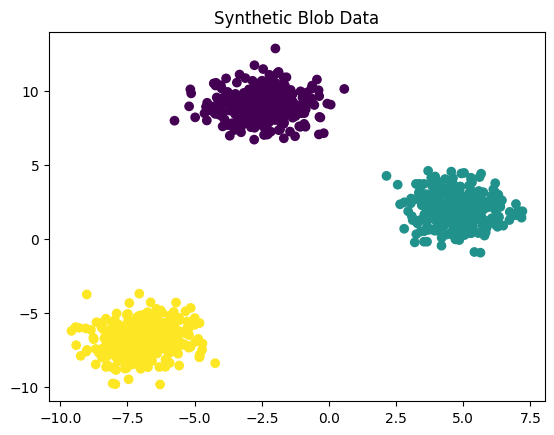

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.0, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Blob Data")
plt.show()

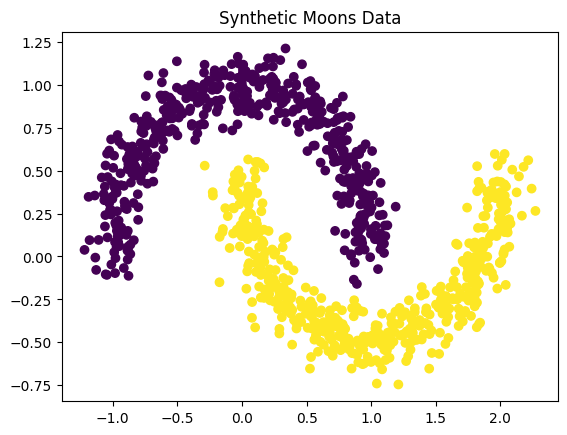

In [2]:
from sklearn.datasets import make_moons

# Generate synthetic data
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Moons Data")
plt.show()


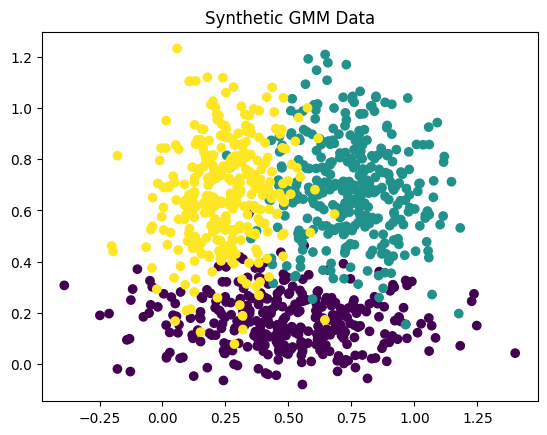

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Parameters for synthetic dataset
n_samples = 1000
n_components = 3
random_state = 42

# Create a GMM
gmm = GaussianMixture(n_components=n_components, random_state=random_state)
gmm.fit(np.random.rand(n_samples, 2))

# Generate synthetic data
X, y = gmm.sample(n_samples)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic GMM Data")
plt.show()


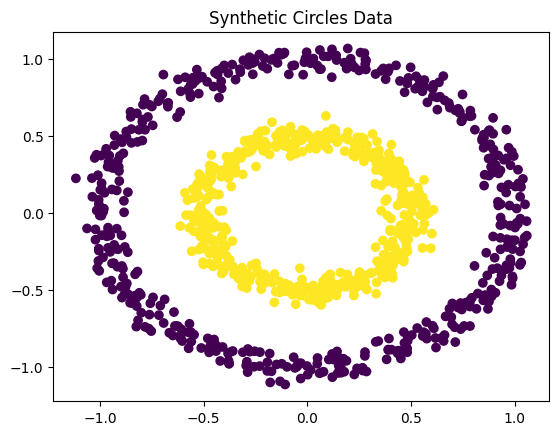

In [4]:
from sklearn.datasets import make_circles

# Generate synthetic data
X, y = make_circles(n_samples=1000, noise=0.05, factor=0.5, random_state=42)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Synthetic Circles Data")
plt.show()


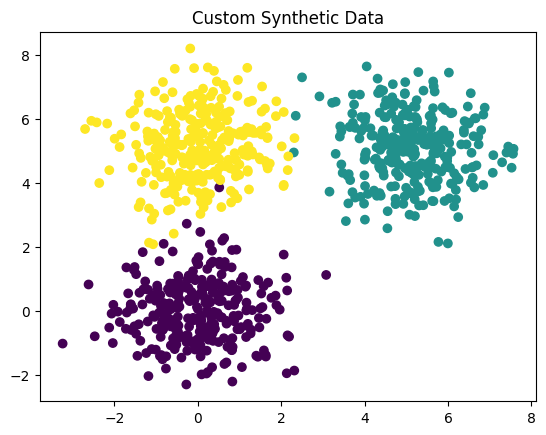

In [6]:
import numpy as np

# Generate custom data
np.random.seed(42)
X = np.vstack([
    np.random.normal(loc=0.0, scale=1.0, size=(300, 2)),
    np.random.normal(loc=5.0, scale=1.0, size=(300, 2)),
    np.random.normal(loc=[0.0, 5.0], scale=1.0, size=(300, 2))
])
y = np.hstack([np.zeros(300), np.ones(300), np.full(300, 2)])

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Custom Synthetic Data")
plt.show()


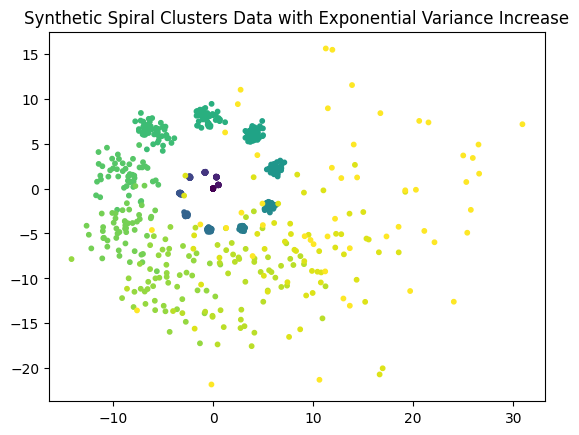

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_clusters(n_clusters, points_per_cluster, base_variance, growth_rate):
    t = np.linspace(0, 4 * np.pi, n_clusters)
    x = t * np.cos(t)
    y = t * np.sin(t)

    X = []
    y_labels = []
    for i in range(n_clusters):
        cx, cy = x[i], y[i]
        variance = base_variance * np.exp(growth_rate * i)  # Exponential increase in variance
        cluster_points = np.random.normal(loc=[cx, cy], scale=variance, size=(points_per_cluster, 2))
        X.append(cluster_points)
        y_labels.append(np.full(points_per_cluster, i))

    X = np.vstack(X)
    y_labels = np.hstack(y_labels)

    return X, y_labels

# Parameters for the dataset
n_clusters = 20
points_per_cluster = 50
base_variance = 0.01  # Base variance
growth_rate = 0.35  # Higher growth rate for exponential increase in variance

# Generate the spiral clusters dataset
X, y_labels = generate_spiral_clusters(n_clusters, points_per_cluster, base_variance, growth_rate)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y_labels, cmap='viridis', s=10)
plt.title("Synthetic Spiral Clusters Data with Exponential Variance Increase")
plt.show()

# Assessing KMeans using micro/macro-averaged Silhouette

In [43]:
from sklearn.metrics import silhouette_samples
import pandas as pd
import numpy as np

class SampleSilhouette:

  def __init__(self, X, clustering, sample_size=None):
    self.X = X
    self.clustering = clustering
    self.point_sil = pd.DataFrame({'sil': silhouette_samples(self.X, self.clustering),
                                   'label':self.clustering})


  def macro(self, per_cluster=False):
    """
    Macro-averaged silhouette, for per-cluster averaging, then returning their mean
    :return: the silhouette aggregated score
    """
    representatives = self.point_sil.groupby('label').sil.apply(np.mean)
    if per_cluster:
        return representatives
    else:
        return representatives.mean()

  def micro(self):
    """
    Micro-averaged silhouette, as in sklearn
    :return: the silhouette aggregated score
    """
    return self.point_sil.sil.mean()

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def generate_spiral_clusters_varying_points(n_clusters, base_points_per_cluster, base_variance, points_growth_factor):
    t = np.linspace(0, 4 * np.pi, n_clusters)
    x = t * np.cos(t)
    y = t * np.sin(t)

    X = []
    y_labels = []
    cluster_sizes = []
    for i in range(n_clusters):
        cx, cy = x[i], y[i]
        variance = base_variance
        # Number of points increasing with a growth factor
        points_per_cluster = int(base_points_per_cluster * np.exp(points_growth_factor * (n_clusters - i)))
        cluster_points = np.random.normal(loc=[cx, cy], scale=variance, size=(points_per_cluster, 2))
        X.append(cluster_points)
        y_labels.append(np.full(points_per_cluster, i))
        cluster_sizes.append(points_per_cluster)

    X = np.vstack(X)
    y_labels = np.hstack(y_labels)

    return X, y_labels, x, y, cluster_sizes

# Parameters for the dataset
n_clusters = 20
base_points_per_cluster = 10
base_variance = 0.1  # Same variance for all clusters

# Highest points growth factor to create the most imbalanced space
points_growth_factor = 0.3

# Generate the spiral clusters dataset
X, y_labels, x, y, cluster_sizes = generate_spiral_clusters_varying_points(n_clusters, base_points_per_cluster, base_variance, points_growth_factor)

# Run K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(X)
kmeans_labels = kmeans.labels_

# Compute the Silhouette Score
score = silhouette_score(X, kmeans_labels)
print(f'Silhouette Score for the most imbalanced space: {score}')

Silhouette Score for the most imbalanced space: 0.8119837331307828


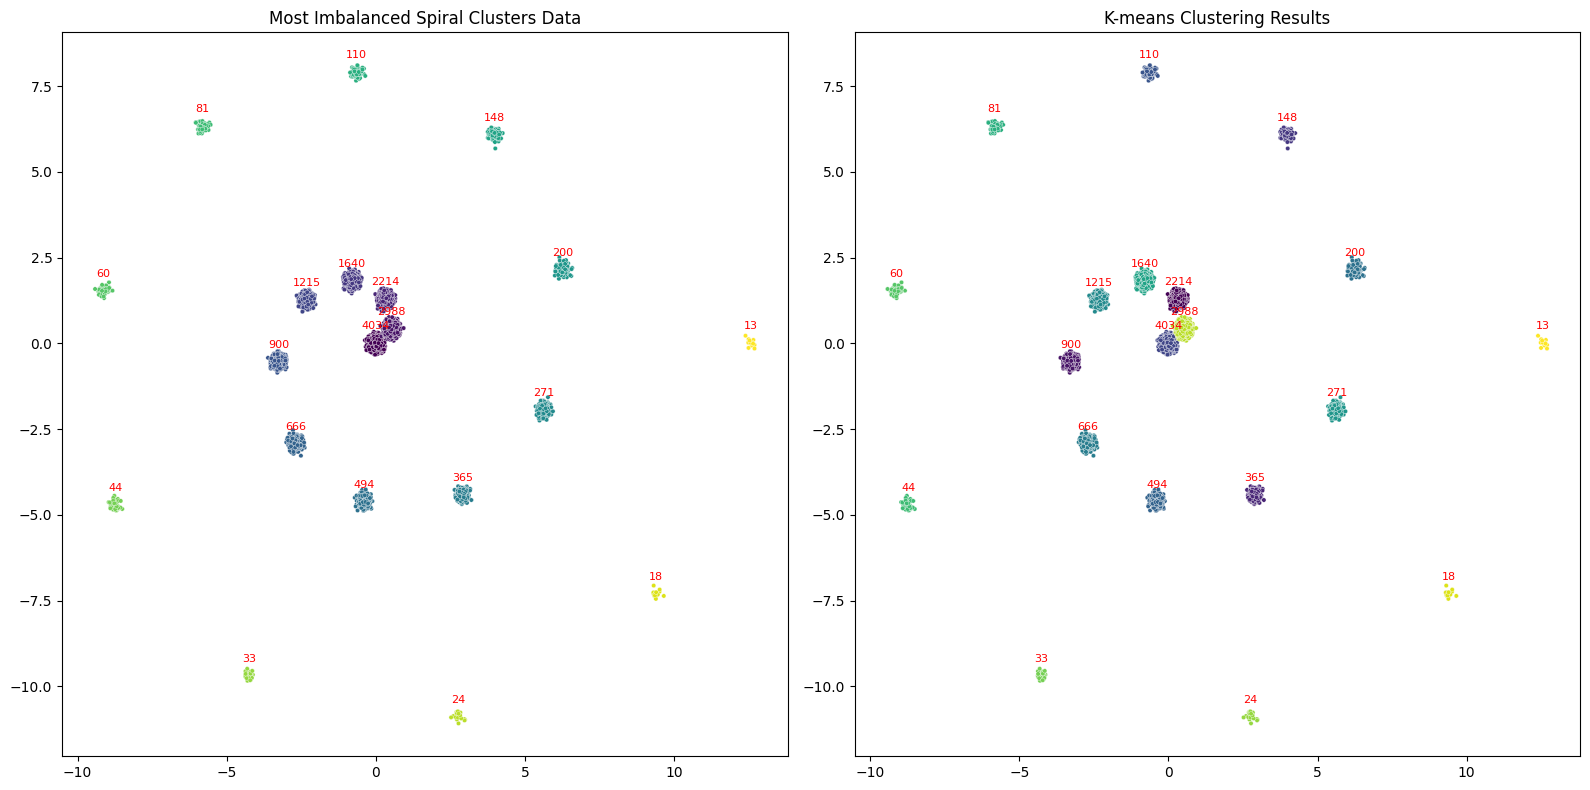

In [59]:
import seaborn as sns

# Plot the original dataset with true labels and annotations
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_labels, palette='viridis', s=10, legend=None)
plt.title("Most Imbalanced Spiral Clusters Data")
for i, (cx, cy) in enumerate(zip(x, y)):
    plt.annotate(str(cluster_sizes[i]), (cx, cy), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Plot the K-means clustering results
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=kmeans_labels, palette='viridis', s=10, legend=None)
plt.title("K-means Clustering Results")
for i, (cx, cy) in enumerate(zip(x, y)):
    plt.annotate(str(cluster_sizes[i]), (cx, cy), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [56]:
# Range of points growth factors to test
points_growth_factors = np.linspace(0.1, 0.3, 10)
macro_scores, micro_scores = [], []
for points_growth_factor in points_growth_factors:
    # Generate the spiral clusters dataset
    X, y_labels, x, y, cluster_sizes = generate_spiral_clusters_varying_points(n_clusters, base_points_per_cluster, base_variance, points_growth_factor)

    # Run K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    kmeans.fit(X)
    kmeans_labels = kmeans.labels_

    # Compute the Silhouette Score
    ssilhouette = SampleSilhouette(X, kmeans_labels)
    macro_scores.append(ssilhouette.macro())
    micro_scores.append(ssilhouette.micro())

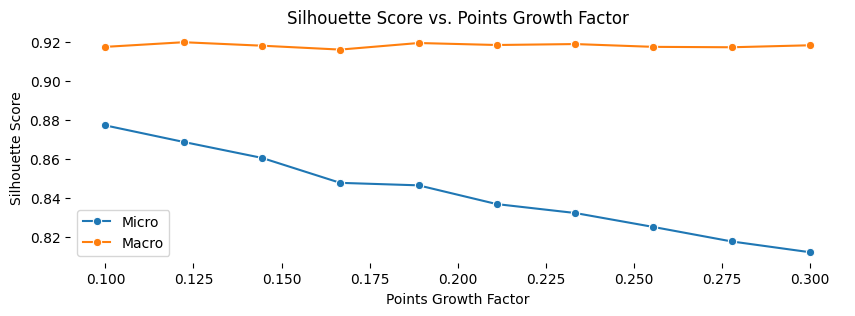

In [56]:
plt.figure(figsize=(10, 3))
sns.lineplot(x=points_growth_factors, y=micro_scores, marker='o', label='Micro')
sns.lineplot(x=points_growth_factors, y=macro_scores, marker='o', label='Macro')
plt.legend()
plt.xlabel('Points Growth Factor')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Points Growth Factor')
sns.despine(left=True, bottom=True)